Carles Falcó i Gandia

Perm Number: 7621931

falcoigandia@ucsb.edu

In [1]:
import matplotlib.pyplot as plt
from numpy import zeros, array
from math import factorial, sin
from pandas import DataFrame
from time import time

# Reduced system
where floating point numbers are represented as $x = \pm S\cdot 2^E$ with $S = (1.b_1b_2)_2$ and $E\in\{-1,0,1\}$.
 
(a) Using basic principle of counting we see that there are:
* 2 ways of choosing the sign
* $2^2$ ways of choosing the mantissa
* 3 ways of choosing the exponent

Then a total of $2\cdot 2^2\cdot 3 = 24$ numbers can be represented.

(b) The following code allows us to represent them in the real line easily.

[-0.5   -0.625 -0.75  -0.875  0.5    0.625  0.75   0.875 -1.    -1.25  -1.5
 -1.75   1.     1.25   1.5    1.75  -2.    -2.5   -3.    -3.5    2.     2.5
  3.     3.5  ]


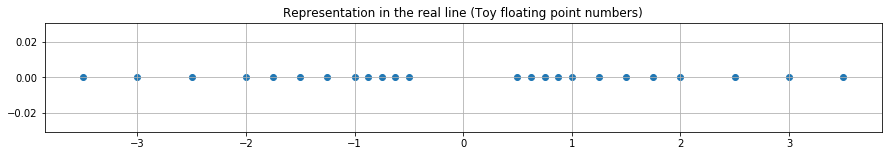

In [2]:
# Displaying numbers in real line
# INPUT: S,E,sign
# OUPTUT: plot
# Carles Falcó i Gandia
# 12/01/19

S = ['00','01','10','11']
E = [-1,0,1]
sign = [-1,1]
dec = []
for e in E:
    for i in sign:
        for s in S:
            dec.append(i*(1+int(s[0])/2+int(s[1])/4)*2**e)
dec = array(dec)
print(dec)
plt.figure(figsize = (15,2))
plt.scatter(dec,zeros(dec.size))
plt.grid()
plt.title('Representation in the real line (Toy floating point numbers)')
plt.show()

As we can see they're not uniformly distributed.

(c) The machine precision of this reduced system is $\epsilon =2^{-2} = 0.25$. Note that $1+\epsilon$ is precisely the smallest number greater than 1.

# How many numbers are there in double precision?

Following the same idea as before, there are:
* 2 ways of choosing the sign
* $2^{52}$ ways of choosing the mantissa
* 11 bits for the exponent $\implies$ $2^{11}$ ways of choosing the exponent

By principle of counting there should be $2\cdot2^{52}\cdot 2^{11} = 2^{64} = 18446744073709551616$ numbers in double precision.
However, according "Numerical computing with IEEE floating point arithmetic" by M. Overton, the IEEE double format uses two different representations for the number $0$ - $-0$ and $+0$. If we understand the question as "how many different numbers are there..." we should exclude one. Also we might not consider NaN and the infinities as numbers. These are represented by fixing to 1 all bits in the exponent. Then there are a total of $2^{64-11} = 2^{53}$ of these "numbers". In conclusion, with these considerations we can represent:
$$2^{64}-2^{53} -1 = 18428729675200069631$$
different numbers in the IEEE double precision format.

# Arithmetic with only two digits using rounding
$x = 2.5$ and $y=2.4$. Then we have:
$$(x-y)^2 = \text{round}(0.01) = 0.0$$
but also $$x^2+y^2-2xy=\text{round}(6.25)+\text{round}(5.76)-12 = 6.3 + 5.8-12 = 0.1$$ while the actual value should be $(x-y)^2 = 0.01$.

# Computing $x-\sin(x)$
for small $x$. We'll have digits cancellation since $\sin(x)\approx x $ for small $x$. First, we can estimate the number of bits we lose in the following way. Imagine that we have $y,x$ with $x>y$ and we find positive integers $p,q$ such that:
$$2^{-q} \leq 1-\frac{y}{x}\leq 2^{-p}$$
Now let's write the floating point representation of $y,x$:
$$x = S_1\cdot2^{E_1}$$
$$y = S_2\cdot2^{E_2}$$ where the two mantissas are greater or equal than 1 and less than 2. Since $x>y$, $E_1>E_2$ and we can rewrite $y = (S_2\cdot2^{E_2-E_1})\cdot2^{E_1}$. Taking the difference we see that:
$$x-y = (S_1-S_2\cdot2^{E_2-E_1})\cdot 2^{E_1}$$ Note that this mantissa
$$(S_1-S_2\cdot2^{E_2-E_1}) = S_1\Big(1-\frac{S_2\cdot2^{E_2}}{S_2\cdot2^{E_2}}\Big) = S_1\Big(1-\frac{y}{x}\Big)$$ is greater than $2^{-q}$ and less than $2^{-p}$. This means that in order to have a normalized representation of the number $x-y$ we should shift the exponent at least $p$ and at most $q$ digits. This means that at least $p$ bits and at most $q$ bits are lost when shifting the exponent.

In our case we have that $\tfrac{\sin(x)}{x}>0.99958\Leftrightarrow 1-\tfrac{\sin(x)}{x} < 0.00042 < 2^{-11}$. Similarly $\tfrac{\sin(x)}{x}<0.9996\Leftrightarrow 1-\tfrac{\sin(x)}{x} > 0.0004> 2^{-12}$. Then according with what we've seen we have that at least we're losing 11 bits of accuracy and at most 12 bits. We'll use the second part of this problem to estimate the relative error we make in this computation.

Another way to compute the difference $x-\sin(x)$ is by using the Taylor expansion at $a=0$ for $$\sin(x) = x-\frac{x^3}{3!}+\frac{x^5}{5!}+\ldots$$
A common expression for the remainder of $f(x) = x-\sin(x)$ is $$R_k(x)=\frac{f^{k+1)}(\eta)}{(k+1)!}x^{k+1}$$ with $\eta\in(0,x)$. The derivatives of $f$ are bounded by 1 and then the error we make by using a Taylor expansion is always less than the quantity: $$\frac{|x|^{k+1}}{(k+1)!}$$
If $x$ is small enough we don't need a lot of terms in the Taylor expansion to ensure that the error we make is less than $\epsilon$ or at least similar. The following code illustrates this.

In [3]:
# Truncated Taylor series of x-sin(x)
# INPUT: x, k (degree)
# OUTPUT: approx x-sin(x)
# Carles Falcó i Gandia
# 14/01/2019

def sin_taylor(x,k):
    return sum([(-1)**(j/2+1/2)*x**j/factorial(j) for j in range(3,k+1,2)])

# Estimating needed degree
# INPUT: x
# OUTPUT: needed degree
# Carles Falcó i Gandia
# 14/01/2019

tol = 2**(-52) # nearly full machine precision
t_max = 30 # limit in time s

def needed_degree(x):
    tic = time()
    x = abs(x)
    k = 1
    while(abs(x)**(k+1)/factorial(k+1) > tol and time() - tic < t_max):
        k += 1
    return k

# Testing for x = 0.05, -0.05, 0.005, 0.0001
l = [0.1,0.05,-0.05,0.005,0.0001]
for k in l:
    print("- Testing for x = %.4f" % k)
    print("The needed degree for the desired accuracy is: %i" % needed_degree(k))
    print("The aproximated value of x-sin(x) is: %.16f" % sin_taylor(k,needed_degree(k)))

- Testing for x = 0.1000
The needed degree for the desired accuracy is: 9
The aproximated value of x-sin(x) is: 0.0001665833531718
- Testing for x = 0.0500
The needed degree for the desired accuracy is: 8
The aproximated value of x-sin(x) is: 0.0000208307293217
- Testing for x = -0.0500
The needed degree for the desired accuracy is: 8
The aproximated value of x-sin(x) is: -0.0000208307293217
- Testing for x = 0.0050
The needed degree for the desired accuracy is: 5
The aproximated value of x-sin(x) is: 0.0000000208333073
- Testing for x = 0.0001
The needed degree for the desired accuracy is: 3
The aproximated value of x-sin(x) is: 0.0000000000001667


Note that only a few terms in the Taylor expansion are needed to achieve nearly full machine precision as $x$ becomes smaller. With this, we can estimate the relative error we make when doing $x-\sin(x)$ for small values of $x$. This relative error will be given by:
$$\big|\frac{y-fl(y)}{y}\big|$$ where $y = x-\sin(x)$. We'll compute the relative error for the values of $x = 0.05,0.005,0.0005,2^{-15},2^{-30}$.

In [4]:
# Computing relative errors
# INPUT: x
# OUTPUT: relative errors
# Carles Falcó i Gandia
# 15/01/2019

z = [0.05,0.005,0.0005,2**(-15),2**(-25)]

def rel(y,fl_y):
    return abs((y-fl_y)/y)

rel_errors = [rel(i-sin(i),sin_taylor(i,needed_degree(i))) for i in z]

data = {'$x$':z,'Relative eror':rel_errors}
DataFrame(data)

,$x$,Relative eror
0,5.000000e-02,2.223434e-13
1,5.000000e-03,1.477428e-11
2,5.000000e-04,1.093470e-08
3,3.051758e-05,2.384186e-07
4,2.980232e-08,1.000000e+00


As the first relative errors may seem acceptable, note that when $x = 2^{-25}$ the digits cancellation leads to a relative error of 1.

# $y= \sqrt{1+x} -1$ for small $x$

(a) First we see that it can be written as:
$$y= \sqrt{1+x} -1 = \sqrt{1+x} -1\frac{\sqrt{1+x} +1}{\sqrt{1+x} +1} = \frac{x}{\sqrt{1+x} +1}$$

(b) When substracting two numbers that are really close in magnitude a cancellation of digits occurs. Let's see this. Imagine that $x,y$ have different sign and $x+y\approx 0$ or at least, its sum it's close to 0. If $fl(x)$ is the floating point representation of $x$ and we assume that their sum is computed exactly we have:
$$fl(x)+fl(y) = x(1+\delta_x) + y(1+\delta_y) = (x+y) + (x\delta_x + y\delta_y)$$ with $|\delta_x|,|\delta_y| < \epsilon$.
Then the relative error we make when adding is:
$$\big|\frac{x+y -fl(x)-fl(y)}{x+y}\big| = \big|\frac{x\delta_x}{x+y}+\frac{y\delta_y}{x+y}\big|$$ which becomes large as $x+y\approx 0$. This is exactly what happens with $y$ when $x$ is small. However by rewriting $y$ in the way we did we avoid having to compute the difference between two close numbers in magnitude and thus, this cancellation of digits.

# Machine precision

By running the program we see that:

In [5]:
# Machine precision
# 14/01/2019

a = 4/3
b = a - 1
c = b + b + b
eps0 = abs(c - 1)
print("Machine precision eps")
eps0

Machine precision eps


2.220446049250313e-16